1. Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import yellowbrick
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import precision_recall_curve, auc
from numpy import argmax

In [ ]:
data = fetch_openml(name='glass', as_frame=True) #загрузка датасета
print(data.DESCR) #текстовое описание датасета

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name glass exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**:   
**Source**: Unknown -   
**Please cite**:   

1. Title: Glass Identification Database
 
 2. Sources:
     (a) Creator: B. German
         -- Central Research Establishment
            Home Office Forensic Science Service
            Aldermaston, Reading, Berkshire RG7 4PN
     (b) Donor: Vina Spiehler, Ph.D., DABFT
                Diagnostic Products Corporation
                (213) 776-0180 (ext 3014)
     (c) Date: September, 1987
 
 3. Past Usage:
     -- Rule Induction in Forensic Science
        -- Ian W. Evett and Ernest J. Spiehler
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
        -- Unknown technical note number (sorry, not listed here)
        -- General Results: nearest neighbor held its own with respect to the
              rule-based system
 
 4. Relevant Information:n
       Vina conducted a comparison test of her rule-based system, BEAGLE, the
       nearest-

 В данном случае можно предположить, что бизнес-задача связана с анализом химического состава стекла, для классификации различных типов стекла.      
 Задача машинного обучения может быть сформулирована как классификация типов стекла на основе их химических составов, используя доступные признаки из датасета.

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names) #преобразуем датасет в датафрейм
df.describe().round(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06
std,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00
25%,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00
50%,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00
75%,1.52,13.82,3.60,1.63,73.09,0.61,9.17,0.00,0.10
max,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51


In [ ]:
X, y = data.data, data.target

2. Проведите предварительный анализ датасета.  Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.

In [ ]:
df.info() #статистическая информация о данных
col_x = X.shape
print('Количество строк:',col_x[0])
print('Количество столбцов:', col_x[1] )
print('Размер целевой переменной:', y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB
Количество строк: 214
Количество столбцов: 9
Размер целевой переменной: (214,)


In [ ]:
data.target.value_counts().reset_index() #Проверка на дисбаланс целевых признаков

,index,Type
0,build wind non-float,76
1,build wind float,70
2,headlamps,29
3,vehic wind float,17
4,containers,13
5,tableware,9


3. Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [ ]:
for column in df.columns: # Преобразование всех нечисловых признаков в числовой формат
    if pd.api.types.is_numeric_dtype(df[column]):
        continue
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        print(f"Невозможно преобразовать признак '{column}' в числовой формат")

print(df.dtypes)

RI    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object


In [ ]:
missing_values = df.isnull().sum() #Проверка наличия пропущенных значений
if missing_values.sum() == 0:
    print("Пропущенных значений в датасете нет.")
else:
    df.fillna(df.mean(), inplace=True)  #Заполнение пропусков медианными значениями
    print("\nПропущенные значения заполнены.")

Пропущенных значений в датасете нет.


4. Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.

Метрика Accuracy - это метрика оценки качества модели в задачах классификации, которая измеряет долю правильно классифицированных объектов относительно общего числа объектов.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
lr = LogisticRegression(solver='lbfgs', max_iter=10000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.6438
Test score: 0.6296


5. К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель.

In [ ]:

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

metrics = pd.DataFrame({
    "Test": [
        precision_score(y_test, y_test_pred, average='weighted'),
        recall_score(y_test, y_test_pred, average='weighted'),
        f1_score(y_test, y_test_pred, average='weighted')]}, index = ["Precision", "Recall", "F1"])
metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Test
Precision,0.591912
Recall,0.629630
F1,0.595743


Модель может лучше среднего предсказывать положительные случаи, при этом она обнаруживает большую часть фактических положительных случаев. Однако точностьпредсказывания все-таки низка

6. Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

y_score = lr.fit(X_train, y_train).predict_proba(X_test)
y_onehot_test.shape  # (n_samples, n_classes) - при ошибке мультиклассовости

(54, 6)

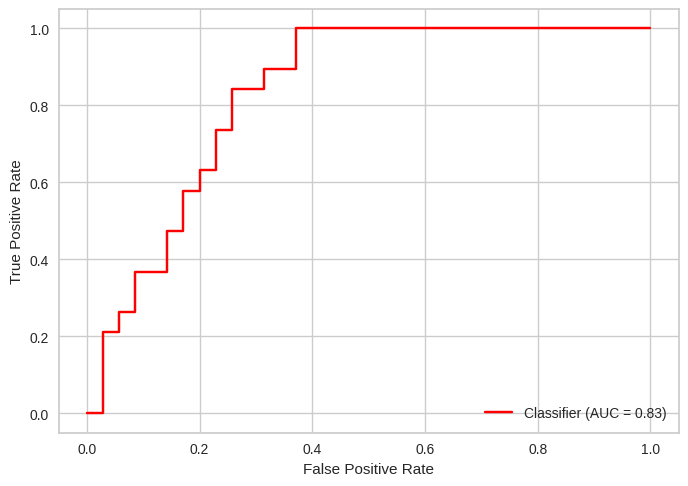

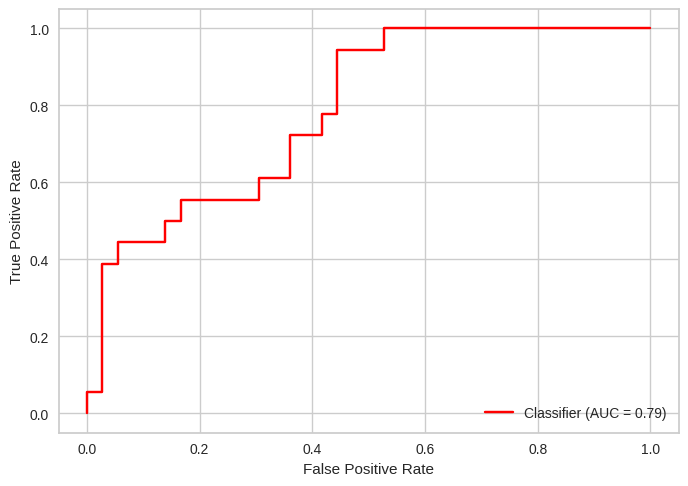

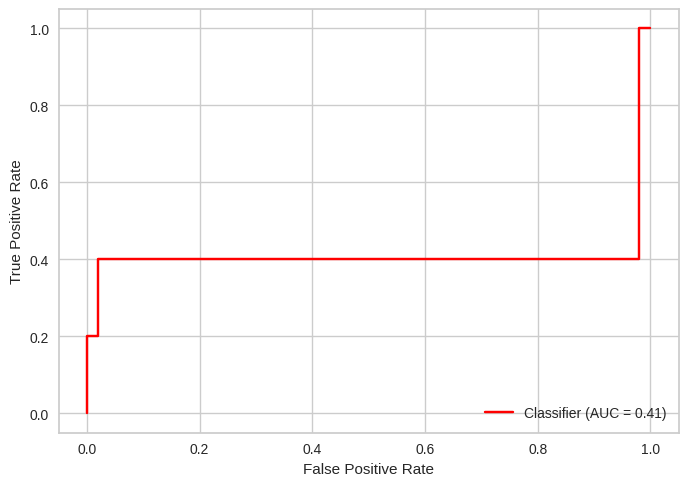

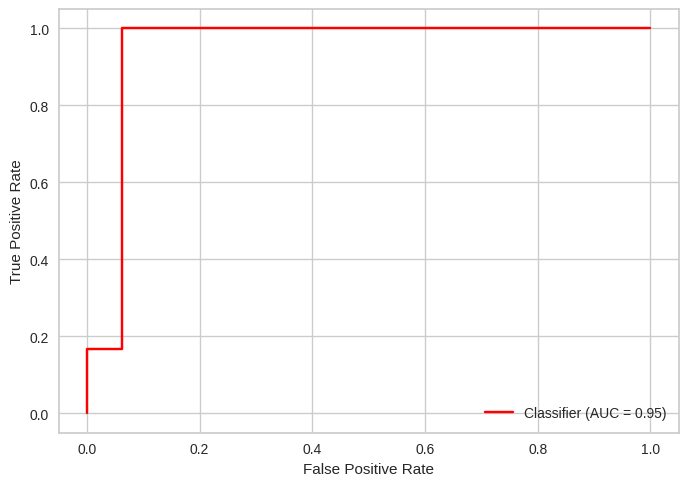

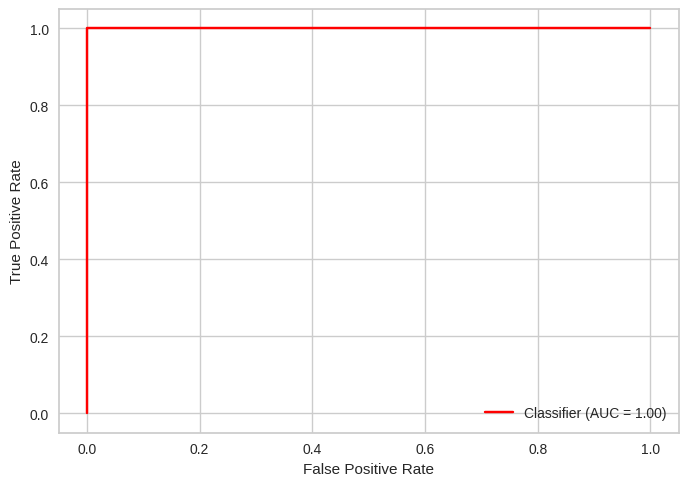

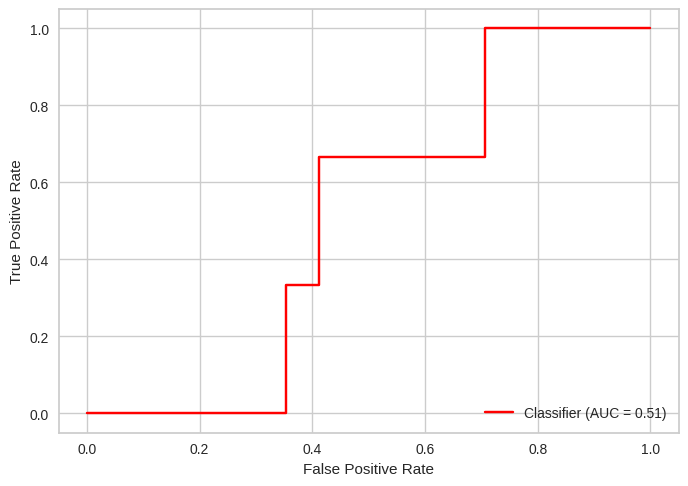

In [ ]:
from sklearn.metrics import RocCurveDisplay
k = [0,1,2,3,4,5]
# y_test = LabelBinarizer().fit(y_test)
for i in k:
  display = RocCurveDisplay.from_predictions(
      y_onehot_test[:, i],
      y_score[:, i],
      color="red",
  )
  _ = display.ax_.set(
      xlabel="False Positive Rate",
      ylabel="True Positive Rate",
  ) #при мультиклассовости

In [ ]:
 optimal_thresholds = {}
 fpr = dict()
 tpr = dict()
 roc_auc = dict()
 thresholds = dict()
 tpr, fpr, thresholds = precision_recall_curve(y_onehot_test[:, 1], y_score[:, 1], pos_label='neg')
 for i in range(6):
     optimal_threshold_index = np.argmax(tpr[i] - fpr[i]) # Находим индекс порога, при котором TPR - FPR максимальна
     optimal_threshold = thresholds[optimal_threshold_index] # Получаем соответствующее значение порога
     optimal_thresholds[i] = optimal_threshold # Сохраняем оптимальный порог для данного класса

 print("Оптимальные значения порога для каждого класса:", optimal_thresholds)

Оптимальные значения порога для каждого класса: {0: 0.00017913050636487825, 1: 0.00017913050636487825, 2: 0.00017913050636487825, 3: 0.00017913050636487825, 4: 0.00017913050636487825, 5: 0.00017913050636487825}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


7. Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели.


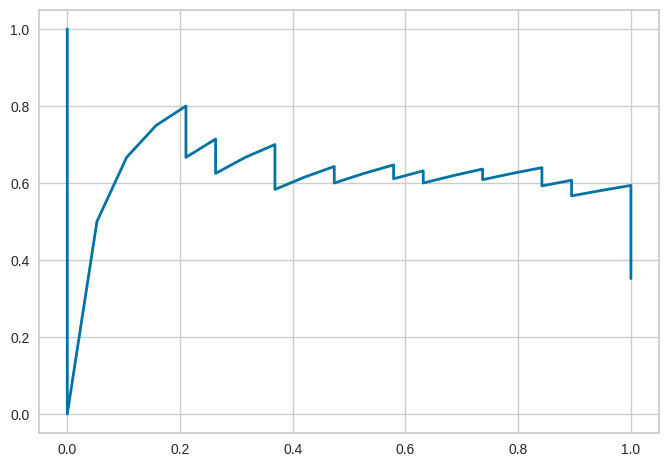

Метрика площади под кривыми PR-AUC: 0.831578947368421
Пороговое значение:  53


<ipython-input-20-122db8d91bb7>:15: RuntimeWarning: invalid value encountered in divide
  ix = np.argmax((2 * p[i] * r[i]) / (p[i] + r[i]))
<ipython-input-20-122db8d91bb7>:16: RuntimeWarning: invalid value encountered in divide
  print('Пороговое значение: ', np.argmax((2 * p[i] * r[i]) / (p[i] + r[i])))


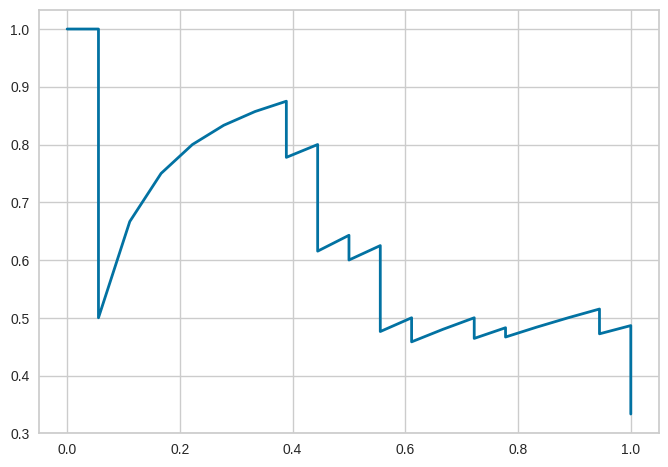

Метрика площади под кривыми PR-AUC: 0.787037037037037
Пороговое значение:  21


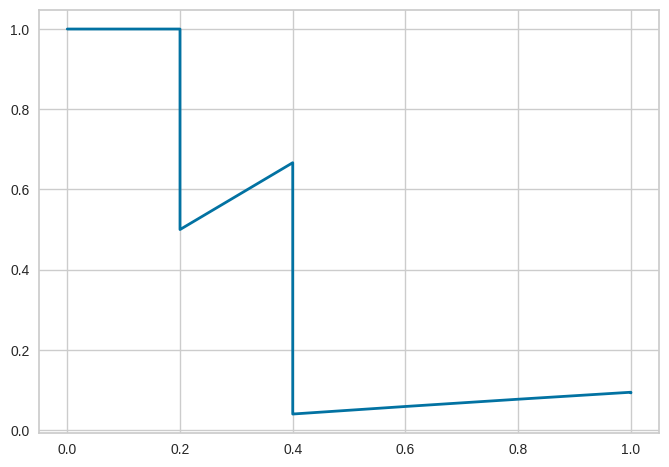

Метрика площади под кривыми PR-AUC: 0.40816326530612246
Пороговое значение:  51


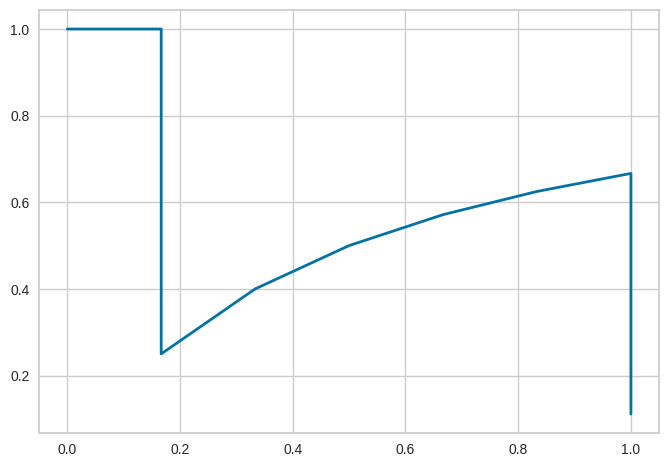

Метрика площади под кривыми PR-AUC: 0.9479166666666666
Пороговое значение:  45


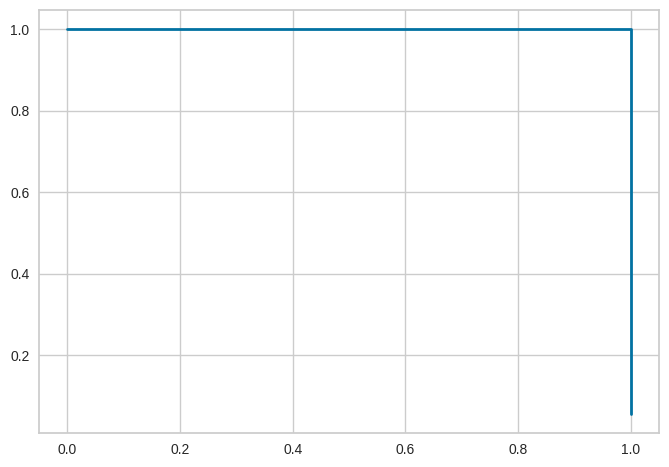

Метрика площади под кривыми PR-AUC: 1.0
Пороговое значение:  51


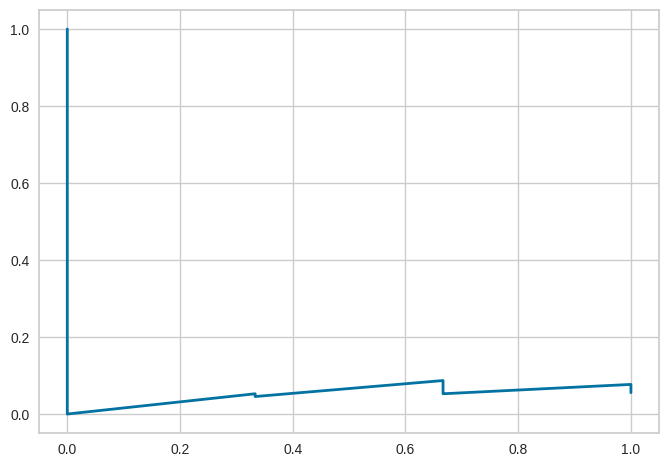

Метрика площади под кривыми PR-AUC: 0.5098039215686274
Пороговое значение:  36


<ipython-input-20-122db8d91bb7>:15: RuntimeWarning: invalid value encountered in divide
  ix = np.argmax((2 * p[i] * r[i]) / (p[i] + r[i]))
<ipython-input-20-122db8d91bb7>:16: RuntimeWarning: invalid value encountered in divide
  print('Пороговое значение: ', np.argmax((2 * p[i] * r[i]) / (p[i] + r[i])))


In [ ]:
p = dict()
r = dict()
pr_thresholds = dict()
pr_auc= {}

for i in range(6):
  p[i], r[i], pr_thresholds = precision_recall_curve(y_onehot_test[:, i], y_score[:, i])
  pr_auc[i] = auc(r[i], p[i])
  plt.plot(r[i], p[i], lw=2, label='PR curve of class %d (area = %0.2f)' % (i, pr_auc[i]))
  plt.show()
  print('Метрика площади под кривыми PR-AUC:', roc_auc_score(y_onehot_test[:, i], y_score[:, i], multi_class='ovr'))

  ix = np.argmax((2 * p[i] * r[i]) / (p[i] + r[i]))
  print('Пороговое значение: ', np.argmax((2 * p[i] * r[i]) / (p[i] + r[i])))



8. Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных.

In [ ]:
X, y = data.data, data.target
skf = StratifiedKFold(n_splits=4,shuffle=True, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

cv_results = cross_val_score(knn,                    # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,               # тип разбиения
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.68518519 0.72222222 0.56603774 0.64150943]
Среднее по кросс-валидации:  0.653738644304682
Дисперсия по кросс-валидации:  0.05813752726784579


Из-за того, что в задаче присутствует дисбаланс классов, оптимальнее использовать StratifiedKFold, так как он используется для невзвешенных классов - учитывает количество объектов каждого класса

9. Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели.

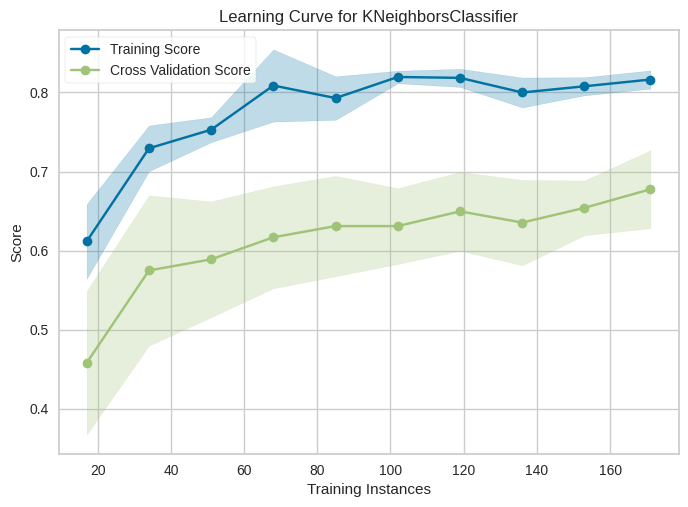

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(knn, train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y).show()

training score не слишком высокий и test score показывает средние результаты, можно сделать вывод что модель недообучилась на входных данных.

10. Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.


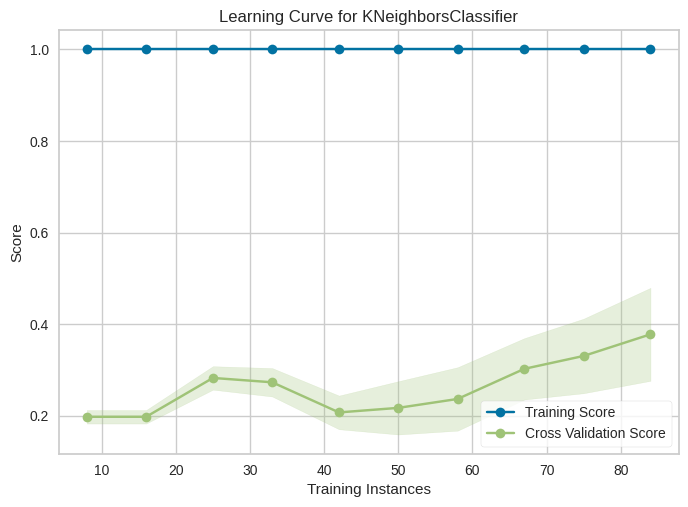

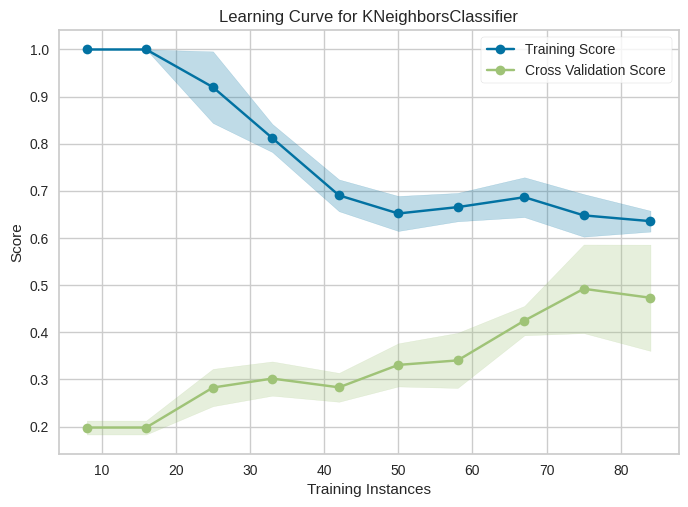

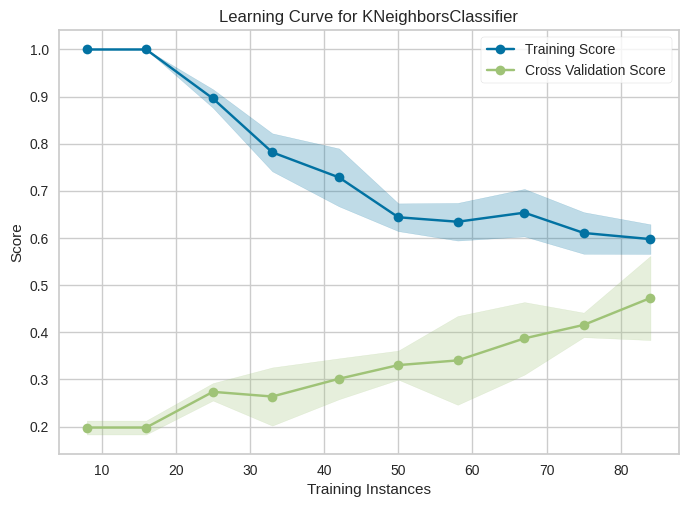

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
Val

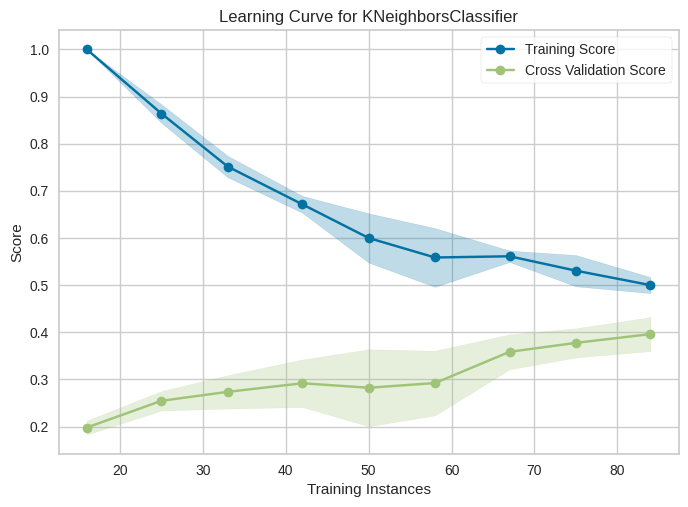

In [ ]:
n = [1, 3, 5, 10]
for i in n:
  visualizer = LearningCurve(KNeighborsClassifier(n_neighbors=i), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y).show()